In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris_x = iris.data[:, :2]
iris_x = iris_x[:100]
iris_y = iris.target[:]
iris_y = iris_y[:100]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_x, iris_y, test_size=0.2)
print(X_test)
print(y_test)

[[4.4 3.2]
 [6.6 2.9]
 [6.3 2.5]
 [4.8 3. ]
 [6.1 2.8]
 [5.5 2.5]
 [5.1 3.3]
 [4.9 3.6]
 [6.9 3.1]
 [4.3 3. ]
 [4.6 3.1]
 [4.6 3.6]
 [5.1 3.8]
 [5.1 3.5]
 [5.4 3.7]
 [4.8 3.1]
 [5.8 2.6]
 [4.9 2.4]
 [4.8 3.4]
 [5.9 3. ]]
[0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1]


In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def train(x, y, w, alpha, epochs):
    ones = np.ones((x.shape[0], 1))
    x = np.concatenate((ones, x), axis=1)
    for i in range(epochs):
        z = np.dot(x, w)
        f = sigmoid(z)
        gradient = np.dot(x.T, (f - y)) / y.size
        w -= alpha * gradient
    return w
w = np.zeros(iris_x.shape[1] + 1)
w = train(X_train, y_train, w, 0.1, 20000)

In [5]:
def predict(x, w, threshold=0.5):
    ones = np.ones((x.shape[0], 1))
    x = np.concatenate((ones, x), axis=1)
    return sigmoid(np.dot(x, w)) >= threshold
y_preds = predict(X_test, w)

In [6]:
y_preds

array([False,  True,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False,  True])

In [7]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_preds)
matrix

array([[12,  0],
       [ 0,  8]])

In [8]:
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 23.52222222222222, 'predicted label')

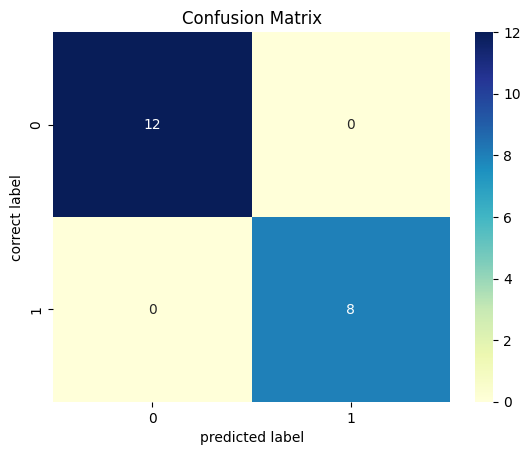

In [9]:
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('correct label')
plt.xlabel('predicted label')

In [10]:
print('Precision: ', metrics.precision_score(y_test, y_preds))
print('Recall: ', metrics.recall_score(y_test, y_preds))
print('Accuracy: ', metrics.accuracy_score(y_test, y_preds))

Precision:  1.0
Recall:  1.0
Accuracy:  1.0


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

Text(0.5, 1.0, 'ROC Curve')

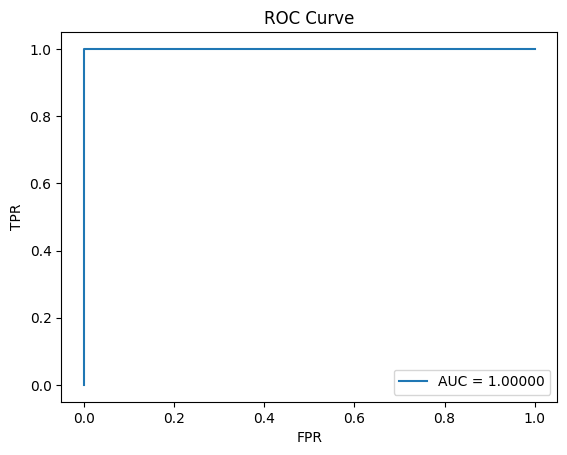

In [12]:
y_preds_prob = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_preds_prob)
auc = metrics.roc_auc_score(y_test, y_preds_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.5f}')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.title('ROC Curve')

In [13]:
from sklearn.datasets import load_digits
mnist = load_digits()
mnist.keys()
mnist_x = mnist['data']
mnist_y = mnist['target']
mnist_y = mnist_y.astype(np.uint8)
mnist_x = mnist_x/16

In [14]:
X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y, test_size=0.3)

In [15]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [16]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_preds)
matrix

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  1,  0,  0,  7],
       [ 0,  1, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  2,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 56,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 50,  0,  0,  0,  1],
       [ 0,  3,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 44,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 43]])

Text(0.5, 23.52222222222222, 'predicted label')

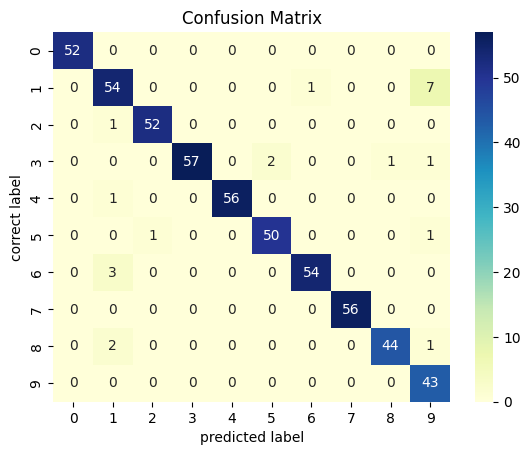

In [17]:
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('correct label')
plt.xlabel('predicted label')

In [18]:
print('Precision: ', metrics.precision_score(y_test, y_preds, average='weighted'))
print('Recall: ', metrics.recall_score(y_test, y_preds, average='weighted'))
print('Accuracy: ', metrics.accuracy_score(y_test, y_preds))

Precision:  0.9623911671734473
Recall:  0.9592592592592593
Accuracy:  0.9592592592592593
